In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data.csv')
data

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
data["Selector"].value_counts()

Selector
1    416
2    167
Name: count, dtype: int64

In [34]:
numeric_vars = [
    "TB"
]

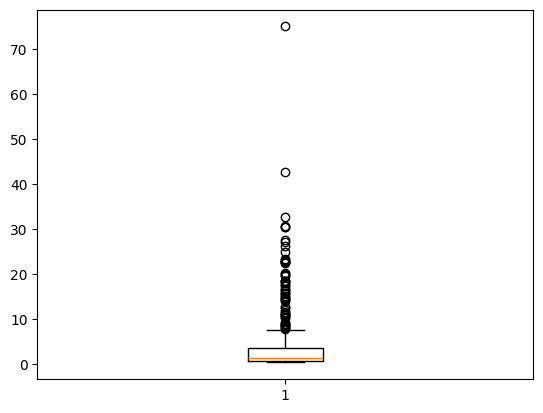

lim_sup: 11.309254128158305
lim_inf: -2.9804079743121505
outliers in inf


KeyError: 'col'

In [40]:
def calculate_numeric_outlier(col, const, selector):
    dataCol = data[data['Selector'] == selector][col]
    plt.boxplot(dataCol)
    plt.show()

    lim_sup = dataCol.mean() + (dataCol.std() * const)
    lim_inf = dataCol.mean() - (dataCol.std() * const)
    print(f"lim_sup: {lim_sup}")
    print(f"lim_inf: {lim_inf}")
    
    print("outliers in inf")
    print(data[data['col'] <= lim_inf][col].tolist())
    
    print("outliers in sup")
    print(data[data['col'] >= lim_sup][col].tolist())

for col in numeric_vars:
    calculate_numeric_outlier(col, 1, 1)